In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import gc
import xarray as xr
import dask 
import pandas as pd
import xrft 
import seawater as sw
from scipy.interpolate import griddata
from matplotlib import ticker

import os.path as op

from dask.diagnostics import ProgressBar
from scipy.ndimage import gaussian_filter as gauss

In [3]:
xmon=2

path='/data/pacific/lrenault/SASI/FULL/WRF/'
listm=glob(path+'*DAY.nc');listm.sort()
varf=xar.open_dataset(listm[-9:][xmon])


path='/data/pacific/lrenault/SASI/SMTH/WRF/'
listt=glob(path+'*DAY.nc');listt.sort()
vart=xar.open_dataset(listt[xmon])


NameError: name 'xar' is not defined

In [4]:
plt.rcParams['font.size']=15
plt.rcParams['font.sans-serif']='Arial'
plt.rcParams['font.weight']='bold'

In [5]:
plt.figure()
plt.contourf(np.arctan2(varf.nav_lat-varf.nav_lat.min(),varf.nav_lon-varf.nav_lon.min()))
plt.colorbar()


NameError: name 'varf' is not defined

<Figure size 432x288 with 0 Axes>

In [6]:
ang = np.arctan2(varf.nav_lat-varf.nav_lat.min(),varf.nav_lon-varf.nav_lon.min()).mean()
X = np.exp(-1j*ang)*(varf.nav_lon-varf.nav_lon.mean() + 1j*(varf.nav_lat-varf.nav_lat.mean()))
xrot,yrot = X.real.mean('y'),X.imag.mean('x')

xrr=np.linspace(xrot.min()*111e3,xrot.max()*111e3,len(xrot))
yrr=np.linspace(yrot.min()*111e3,yrot.max()*111e3,len(yrot))

NameError: name 'varf' is not defined

In [ ]:
# af = varf.SST[xday].assign_coords(xrot=xrot,yrot=yrot).drop(['nav_lat','nav_lon'])
# at = vart.SST[xday].assign_coords(xrot=xrot,yrot=yrot).drop(['nav_lat','nav_lon'])
xday=15
af = varf.SST[xday][:,0:200].assign_coords(x=xrr[0:200],y=yrr).drop(['nav_lat','nav_lon'])
at = vart.SST[xday][:,0:200].assign_coords(x=xrr[0:200],y=yrr).drop(['nav_lat','nav_lon'])
# at.data=gauss(vart.SST[xday],5)





# af = xr.DataArray(varf.SST[xday].data,dims=('ya','xa'),coords={'xa':(('xa','ya'),xrot),'ya':(('xa','ya'),yrot)})

# at = xr.DataArray(vart.SST[xday].data,dims=('ya','xa'),coords={'xa':(('xa','ya'),xrot),'ya':(('xa','ya'),yrot)})


In [ ]:

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.contourf(af.x,af.y,af-273.15,levels=np.linspace(5,10,31),cmap='jet')
plt.grid(alpha=0.4)
plt.colorbar()

plt.subplot(1,2,2)
plt.contourf(at.x,af.y,at-273.15,levels=np.linspace(5,10,31),cmap='jet')
plt.grid(alpha=0.4)
plt.colorbar()




In [277]:
full_ps = xrft.power_spectrum(af,dim=["x","y"])
smth_ps = xrft.power_spectrum(at,dim=["x","y"])


iso_f = xrft.isotropic_powerspectrum(af, dim=['x','y'],detrend='constant')
iso_t = xrft.isotropic_powerspectrum(at, dim=['x','y'],detrend='constant')


fy=smth_ps.freq_y
fx=smth_ps.freq_x

fx,fy=np.meshgrid(fx,fy)

/opt/anaconda3/lib/python3.8/site-packages/xrft/xrft.py:1063: Warning: This function has been renamed and will disappear in the future. Please use isotropic_power_spectrum instead
  warnings.warn(msg, Warning)
/opt/anaconda3/lib/python3.8/site-packages/xrft/xrft.py:1041: FutureWarning: The flag `truncate` will be set to True by default in future version in order to truncate the isotropic wavenumber larger than the Nyquist wavenumber.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/xrft/xrft.py:1063: Warning: This function has been renamed and will disappear in the future. Please use isotropic_power_spectrum instead
  warnings.warn(msg, Warning)
/opt/anaconda3/lib/python3.8/site-packages/xrft/xrft.py:1041: FutureWarning: The flag `truncate` will be set to True by default in future version in order to truncate the isotropic wavenumber larger than the Nyquist wavenumber.
  warnings.warn(msg, FutureWarning)


([<matplotlib.axis.XTick at 0x7fa512c3e3d0>,
 [Text(0, 0, '10$^3$'), Text(0, 0, '10$^4$'), Text(0, 0, '10$^5$')])

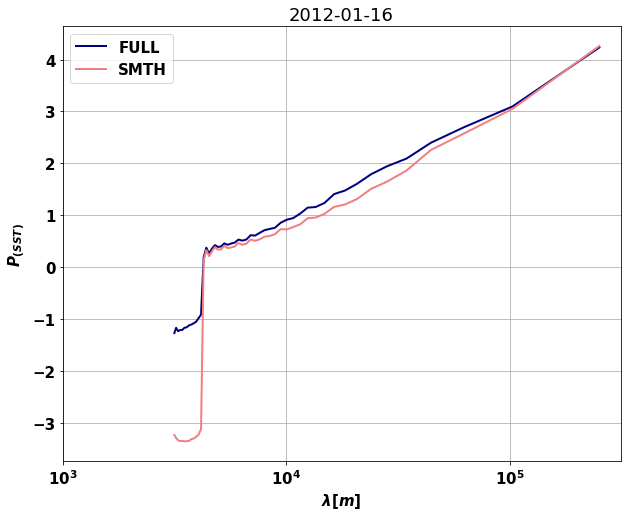

In [278]:

# plt.figure(figsize=(23,6))
# plt.subplot(1,3,1)
# plt.contourf(fx,fy,np.log(full_ps),levels=np.linspace(0,24,51),cmap='rainbow')
# plt.colorbar()
# plt.title('FULL')

# plt.subplot(1,3,2)
# plt.contourf(fx,fy,np.log(smth_ps),levels=np.linspace(0,24,51),cmap='rainbow')
# plt.colorbar()
# plt.title('SMTH')

# plt.subplot(1,3,3)
# plt.contourf(fx,fy,full_ps-smth_ps,levels=np.linspace(-1000,1000,51),cmap='seismic')
# plt.colorbar()
# plt.title('FULL - SMTH')



# plt.figure(figsize=(10,8))
# plt.plot(np.log10(2*np.pi/iso_f.freq_r),np.log10(iso_f),label='FULL',linewidth=2,color='navy')
# plt.plot(np.log10(2*np.pi/iso_f.freq_r),np.log10(iso_t),label='SMTH',linewidth=2,color='lightcoral')
# plt.ylabel(r'$P_{(SST)}$')
# # plt.xlabel(r'$\lambda$ [km]')
# plt.legend()
# plt.grid()
# # plt.xlim(0,10)


plt.figure(figsize=(10,8))
plt.plot(np.log10(1/iso_f.freq_r),np.log10(iso_f),label='FULL',linewidth=2,color='navy')
plt.plot(np.log10(1/iso_f.freq_r),np.log10(iso_t),label='SMTH',linewidth=2,color='lightcoral')
plt.ylabel(r'$P_{(SST)}$')
# plt.xlabel(r'$\lambda$ [km]')
plt.legend()
plt.grid()
plt.title(np.datetime_as_string(varf.time_counter[xday].data)[:10])
plt.xlabel(r'$\lambda [m]$')
plt.xticks(np.arange(3,6,1),[r'10$^3$',r'10$^4$',r'10$^5$'])
# plt.xlim(0,10)

# plt.figure()
# plt.plot(iso_f-iso_t)

# plt.figure(figsize=(10,8))
# plt.plot(1/iso_f.freq_r,iso_f,norm='logNorm()',label='FULL',linewidth=2,color='navy')
# plt.plot(np.log(1/iso_f.freq_r),np.log(iso_t),label='SMTH',linewidth=2,color='lightcoral')
# plt.ylabel(r'$P_{(SST)}$')
# # plt.xlabel(r'$\lambda$ [km]')
# plt.legend()
# plt.grid()
# plt.ylim(3,5)





